<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_06/blob/Final_version/All_test_cases_with_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test 1

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

# Get domain parameters
def getInputs():
    """
    Gets the inputs

    Returns
    L : float
        Total length of the domain (m).
    T : float
        Total simulation time (s).
    U : float
        Constant flow velocity across the domain (m/s).
    Nx : int
        Number of spatial nodes.
    Nt : int
        Number of time steps.
    dx : float
        Spatial step size (m).
    dt : float
        Time step size (s).
    k : float, optional
        First‑order decay coefficient (1/s).
    """

    # Gets inputs for the domain length, time, river velocity and decay constant
    L = float(input("Enter domain length (m): "))
    T = float(input("Enter total simulation time (s): "))
    U = float(input("Enter river velocity U (m/s): "))
    k = float(input("Enter the decay constant (if no decay enter 0) "))

    print("\nGrid setup options:")
    print("1. Input number of grid points (Nx, Nt)")
    print("2. Input step sizes (Δx, Δt)")
    choice = input("Enter 1 or 2: ") # allows the user to pick which option they can input and does calculations to determine the other pair of values

    if choice == "1":
        Nx = int(input("Enter Nx (number of spatial points): "))
        Nt = int(input("Enter Nt (number of time steps): "))
        dx = L / (Nx - 1)
        dt = T / (Nt - 1)
    else:
        dx = float(input("Enter Δx (spatial step size in m): "))
        dt = float(input("Enter Δt (time step size in s): "))
        Nx = int(L / dx) + 1
        Nt = int(T / dt) + 1

    return L, T, U, Nx, Nt, dx, dt, k #returns all necessary values

def concovertime(L, T, U, Nx, Nt, dx, dt, decay=0):
    # Create grids
    """
    Question 1

    Parameters
    L : float
        Total length of the domain (m).
    T : float
        Total simulation time (s).
    U : float
        Constant flow velocity across the domain (m/s).
    Nx : int
        Number of spatial nodes.
    Nt : int
        Number of time steps.
    dx : float
        Spatial step size (m).
    dt : float
        Time step size (s).
    decay : float, optional
        First‑order decay coefficient (1/s). Default is 0 (no decay).

    Returns
    x : numpy.ndarray (shape: Nx)
        Spatial coordinates along the domain (m).
    history : numpy.ndarray (shape: Nt × Nx)
        Concentration field at all time steps.
        Each row corresponds to a time step, each column to a spatial node.
    """
    #creates equally spaced arrays using linspace upto the values of nx and nt
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)
    #Creates the storage arrays of size Nx-1
    theta_new = np.zeros(Nx-1)
    theta_old = np.zeros(Nx-1)

    # Arrays for matrix coefficients
    A = np.zeros(Nx-1)
    B = np.zeros(Nx-1)
    F = np.zeros(Nx-1)

    history = np.zeros((Nt, Nx-1))
    history[0, 0] = 250.0

    # Constant velocity array
    u = np.full(Nx-1, U)

    # Main simulation loop
    for j in range(1, Nt):
        theta_new[:] = 0.0
        theta_new[0] = 250.0 * np.exp(-decay * j * dt)  # boundary with decay

        # Store values in A and B
        for i in range(Nx-1):
            A[i] = (1.0 / dt) + (u[i] / dx)
            B[i] = - u[i] / dx

        # RHS vector F
        for i in range(Nx-2):
            F[i] = (1/dt) * theta_old[i+1]

        # Forward substitution
        for I in range(1, Nx-1):
            theta_new[I] = (1/A[I-1]) * (F[I-1] - B[I-1]*theta_new[I-1])

        history[j] = theta_new.copy() # keeps track of values
        theta_old[:] = theta_new[:]

    print("A[0:3] =", A[:3])
    print("B[0:3] =", B[:3])
    print("theta_new[0:10] =", theta_new[:10])

    # Animation of the graphs
    matplotlib.rcParams["animation.html"] = "jshtml"
    matplotlib.rcParams['figure.dpi'] = 150
    plt.ioff()
    fig, ax = plt.subplots(figsize=(8,5))

    def animate(frame):
        ax.cla()
        ax.plot(x[:-1], history[frame, :], color='blue')
        ax.set_xlabel("Distance downstream (m)")
        ax.set_ylabel("Concentration (µg/m³)")
        ax.set_ylim(0, 260)
        ax.grid(True)
        ax.set_title(f"Pollutant concentration at t = {frame*dt:.1f} s")

    ani = FuncAnimation(fig, animate, frames=Nt, interval=50)
    return ani # returns the graph

L, T, U, Nx, Nt, dx, dt, k = getInputs()
concovertime(L, T, U, Nx, Nt, dx, dt, k)

Enter domain length (m): 20
Enter total simulation time (s): 300
Enter river velocity U (m/s): 0.1
Enter the decay constant (if no decay enter 0) 0

Grid setup options:
1. Input number of grid points (Nx, Nt)
2. Input step sizes (Δx, Δt)
Enter 1 or 2: 2
Enter Δx (spatial step size in m): 0.2
Enter Δt (time step size in s): 10
A[0:3] = [0.6 0.6 0.6]
B[0:3] = [-0.5 -0.5 -0.5]
theta_new[0:10] = [250. 250. 250. 250. 250. 250. 250. 250. 250. 250.]


## Test 2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

# Get domain parameters
def getInputs():
    """
    Gets the inputs

    Returns
    L : float
        Total length of the domain (m).
    T : float
        Total simulation time (s).
    U : float
        Constant flow velocity across the domain (m/s).
    Nx : int
        Number of spatial nodes.
    Nt : int
        Number of time steps.
    dx : float
        Spatial step size (m).
    dt : float
        Time step size (s).
    k : float, optional
        First‑order decay coefficient (1/s).
    """

    L = float(input("Enter domain length (m): "))
    T = float(input("Enter total simulation time (s): "))
    U = float(input("Enter river velocity U (m/s): "))
    k = 0  # no decay for Test Case 2

    print("\nGrid setup options:")
    print("1. Input number of grid points (Nx, Nt)")
    print("2. Input step sizes (Δx, Δt)")
    choice = input("Enter 1 or 2: ")

    if choice == "1":
        Nx = int(input("Enter Nx (number of spatial points): "))
        Nt = int(input("Enter Nt (number of time steps): "))
        dx = L / (Nx - 1)
        dt = T / (Nt - 1)
    else:
        dx = float(input("Enter Δx (spatial step size in m): "))
        dt = float(input("Enter Δt (time step size in s): "))
        Nx = int(L / dx) + 1
        Nt = int(T / dt) + 1

    return L, T, U, Nx, Nt, dx, dt, k

def read_initial_conditions(filename, model_x):
    """
    Reads initial conditions from a CSV file and interpolates them
    onto the model grid.

    """
    my_data = pd.read_csv(filename, header=0, index_col=0, encoding='latin-1')
    measurement_x = my_data.index.values.astype(float)   # x positions from CSV
    measurement_values = my_data.iloc[:, 0].values       # concentration values

    # Interpolate onto model grid
    theta_init = np.interp(model_x[:-1], measurement_x, measurement_values)
    return theta_init

def concovertime(L, T, U, Nx, Nt, dx, dt, decay=0, init_file=None):
    """
    Question 2

    Parameters
    L : float
        Total length of the domain (m).
    T : float
        Total simulation time (s).
    U : float
        Constant flow velocity across the domain (m/s).
    Nx : int
        Number of spatial nodes.
    Nt : int
        Number of time steps.
    dx : float
        Spatial step size (m).
    dt : float
        Time step size (s).
    decay : float, optional
        First‑order decay coefficient (1/s). Default is 0 (no decay).
    init_file : String
        Name of the file

    Returns
    x : numpy.ndarray (shape: Nx)
        Spatial coordinates along the domain (m).
    history : numpy.ndarray (shape: Nt × Nx)
        Concentration field at all time steps.
        Each row corresponds to a time step, each column to a spatial node.
    """
    # Create grids
    x = np.linspace(0, L, Nx)
    theta_new = np.zeros(Nx-1)
    theta_old = np.zeros(Nx-1)

    # Arrays for matrix coefficients
    A = np.zeros(Nx-1)
    B = np.zeros(Nx-1)
    F = np.zeros(Nx-1)

    history = np.zeros((Nt, Nx-1))

    # Constant velocity
    u = np.full(Nx-1, U)

    # Read and interpolate initial conditions if provided
    if init_file:
        theta_old[:] = read_initial_conditions(init_file, x)
    else:
        theta_old[0] = 250.0  # default boundary

    history[0, :] = theta_old.copy()

    # Main simulation loop
    for j in range(1, Nt):
        theta_new[:] = 0.0
        theta_new[0] = theta_old[0]  # maintain boundary

        # Store values in A and B
        for i in range(Nx-1):
            A[i] = (1.0 / dt) + (u[i] / dx)
            B[i] = - u[i] / dx

        # RHS vector F
        for i in range(Nx-2):
            F[i] = (1/dt) * theta_old[i+1]

        # Forward substitution
        for I in range(1, Nx-1):
            theta_new[I] = (1/A[I-1]) * (F[I-1] - B[I-1]*theta_new[I-1])

        history[j] = theta_new.copy()
        theta_old[:] = theta_new[:]

    print("A[0:3] =", A[:3])
    print("B[0:3] =", B[:3])
    print("theta_new[0:10] =", theta_new[:10])

    # Animation
    matplotlib.rcParams["animation.html"] = "jshtml"
    matplotlib.rcParams['figure.dpi'] = 150
    plt.ioff()
    fig, ax = plt.subplots(figsize=(8,5))

    def animate(frame):
        ax.cla()
        ax.plot(x[:-1], history[frame, :], color='blue')
        ax.set_xlabel("Distance downstream (m)")
        ax.set_ylabel("Concentration (µg/m³)")
        ax.set_ylim(0, max(history.max()*1.1, 260))
        ax.grid(True)
        ax.set_title(f"Pollutant concentration at t = {frame*dt:.1f} s")

    ani = FuncAnimation(fig, animate, frames=Nt, interval=50)
    return ani

# Run test case 2
L, T, U, Nx, Nt, dx, dt, k = getInputs()
concovertime(L, T, U, Nx, Nt, dx, dt, k, init_file='initial_conditions.csv')




Enter domain length (m): 20
Enter total simulation time (s): 300
Enter river velocity U (m/s): 0.1

Grid setup options:
1. Input number of grid points (Nx, Nt)
2. Input step sizes (Δx, Δt)
Enter 1 or 2: 2
Enter Δx (spatial step size in m): 0.1
Enter Δt (time step size in s): 20
A[0:3] = [1.05 1.05 1.05]
B[0:3] = [-1. -1. -1.]
theta_new[0:10] = [300. 300. 300. 300. 300. 300. 300. 300. 300. 300.]


# Test 3

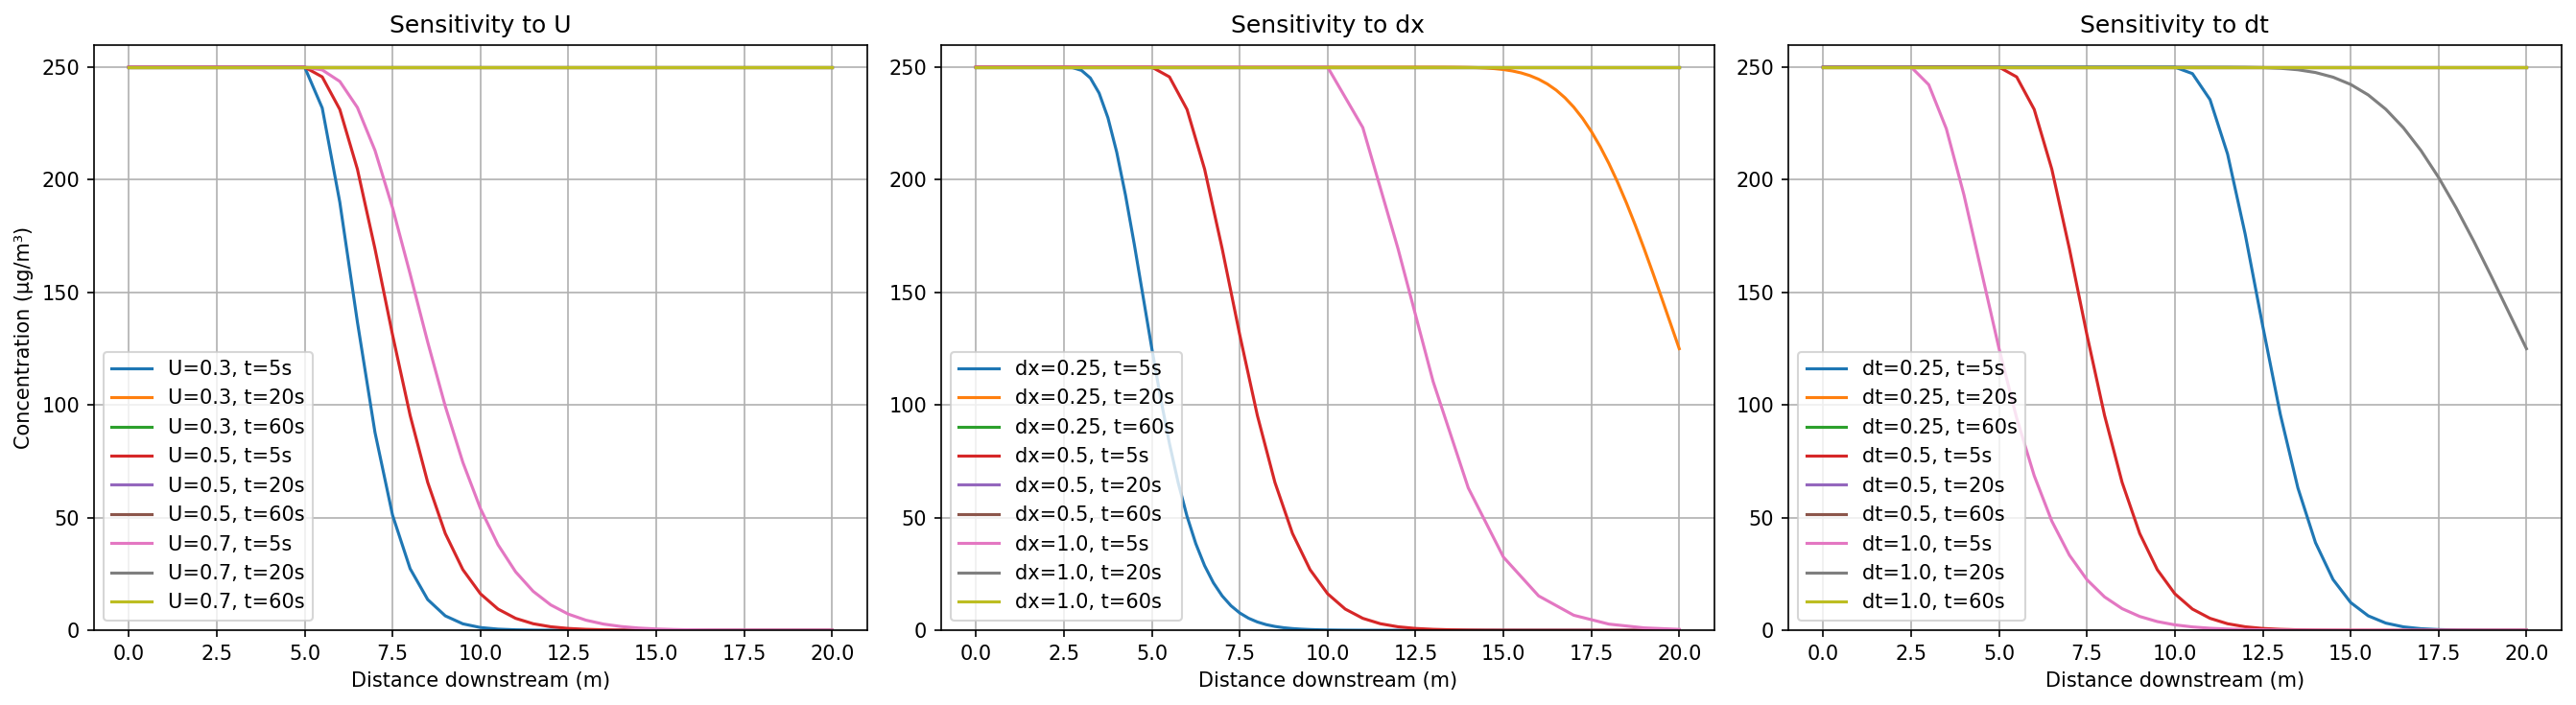

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

# Function to run the model
def concovertime(L, T, U, dx, dt, decay=0):
    '''
  Gets all inputs needed for the equation

    Parameters:
        L(float)
        T(float)
        U(float)
        Nx(Int)
        Nt(Int)
        dx(float)
        dt(float)
        decay(float)
        random(float)
    '''

    Nx = int(L / dx) + 1
    Nt = int(T / dt) + 1
    x = np.linspace(0, L, Nx)
    theta_new = np.zeros(Nx)
    theta_old = np.zeros(Nx)

    A = np.zeros(Nx)
    B = np.zeros(Nx)
    F = np.zeros(Nx)

    theta_old[0]=250.0

    history = np.zeros((Nt, Nx))
    history[0, :] = theta_old.copy() # upstream boundary

    u = np.full(Nx, U)

    for j in range(1, Nt):
        theta_new[:] = 0.0
        theta_new[0] = 250.0 * np.exp(-decay * j * dt)  # upstream boundary

        for i in range(Nx):
            A[i] = (1.0 / dt) + (u[i] / dx)
            B[i] = -u[i] / dx

        for i in range(Nx-1):
            F[i] = (1/dt) * theta_old[i]

        for i in range(1, Nx):
            theta_new[i] = (1/A[i-1]) * (F[i-1] - B[i-1]*theta_new[i-1])

        history[j, :] = theta_new.copy()
        theta_old[:] = theta_new[:]

    return x, history

# Sensitivity test

L = 20.0
T = 60.0
U_base = 0.5
dx_base = 0.5
dt_base = 0.5
#Nx_base = int(L/dx_base)+1
#Nt_base = int(T/dt_base)+1

# Variations
U_values = [0.3, 0.5, 0.7]
dx_values = [0.25, 0.5, 1.0]
dt_values = [0.25, 0.5, 1.0]

times_to_plot = [5, 20, 60]

fig, axes = plt.subplots(1,3, figsize=(18,5))

# Sensitivity to U
for U in U_values:
    x, history = concovertime(L, T, U, dx_base, dt_base)
    for t in times_to_plot:
        n = int(t / dt_base)
        axes[0].plot(x, history[n, :], label=f'U={U}, t={t}s')
axes[0].set_title("Sensitivity to U")
axes[0].set_xlabel("Distance downstream (m)")
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(0,260)

# Sensitivity to dx
for dx in dx_values:
    x, history = concovertime(L, T, U_base, dx, dt_base)
    for t in times_to_plot:
        n = int(t / dt_base)
        axes[1].plot(x, history[n, :], label=f'dx={dx}, t={t}s')
axes[1].set_title("Sensitivity to dx")
axes[1].set_xlabel("Distance downstream (m)")
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(0,260)

# Sensitivity to dt
for dt in dt_values:
    x, history = concovertime(L, T, U_base, dx_base, dt)
    for t in times_to_plot:
        n = int(t / dt)
        axes[2].plot(x, history[n, :], label=f'dt={dt}, t={t}s')
axes[2].set_title("Sensitivity to dt")
axes[2].set_xlabel("Distance downstream (m)")
axes[2].legend()
axes[2].grid(True)
axes[2].set_ylim(0,260)

plt.tight_layout()
plt.show()


# Test 4

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

# Get domain parameters
def getInputs():
    L = float(input("Enter domain length (m): "))
    T = float(input("Enter total simulation time (s): "))
    U = float(input("Enter river velocity U (m/s): "))
    k = float(input("Enter the decay constant (if no decay enter 0) (<0.1)"))

    print("\nGrid setup options:")
    print("1. Input number of grid points (Nx, Nt)")
    print("2. Input step sizes (Δx, Δt)")
    choice = input("Enter 1 or 2: ")

    if choice == "1":
        Nx = int(input("Enter Nx (number of spatial points): "))
        Nt = int(input("Enter Nt (number of time steps): "))
        dx = L / (Nx - 1)
        dt = T / (Nt - 1)
    else:
        dx = float(input("Enter Δx (spatial step size in m): "))
        dt = float(input("Enter Δt (time step size in s): "))
        Nx = int(L / dx) + 1
        Nt = int(T / dt) + 1

    return L, T, U, Nx, Nt, dx, dt, k

def concovertime(L, T, U, Nx, Nt, dx, dt, decay=0):
    '''
  Gets all inputs needed for the equation

    Parameters:
        L(float)
        T(float)
        U(float)
        Nx(Int)
        Nt(Int)
        dx(float)
        dt(float)
        decay(float)
        random(float)
    '''
    # Create grids
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)
    theta_new = np.zeros(Nx-1)
    theta_old = np.zeros(Nx-1)

    # Arrays for matrix coefficients
    A = np.zeros(Nx-1)
    B = np.zeros(Nx-1)
    F = np.zeros(Nx-1)

    history = np.zeros((Nt, Nx-1))
    history[0, 0] = 250.0

    # Constant velocity
    u = np.full(Nx-1, U)

    # Main simulation loop
    for j in range(1, Nt):
        theta_new[:] = 0.0
        theta_new[0] = 250.0 * np.exp(-decay * j * dt)  # boundary with decay

        # Store values in A and B
        for i in range(Nx-1):
            A[i] = (1.0 / dt) + (u[i] / dx)
            B[i] = - u[i] / dx

        # RHS vector F
        for i in range(Nx-2):
            F[i] = (1/dt) * theta_old[i+1]

        # Forward substitution
        for I in range(1, Nx-1):
            theta_new[I] = (1/A[I-1]) * (F[I-1] - B[I-1]*theta_new[I-1])

        history[j] = theta_new.copy()
        theta_old[:] = theta_new[:]

    print("A[0:3] =", A[:3])
    print("B[0:3] =", B[:3])
    print("theta_new[0:10] =", theta_new[:10])

    # Animation
    matplotlib.rcParams["animation.html"] = "jshtml"
    matplotlib.rcParams['figure.dpi'] = 150
    plt.ioff()
    fig, ax = plt.subplots(figsize=(8,5))

    def animate(frame):
        ax.cla()
        ax.plot(x[:-1], history[frame, :], color='blue')
        ax.set_xlabel("Distance downstream (m)")
        ax.set_ylabel("Concentration (µg/m³)")
        ax.set_ylim(0, 260)
        ax.grid(True)
        ax.set_title(f"Pollutant concentration at t = {frame*dt:.1f} s")

    ani = FuncAnimation(fig, animate, frames=Nt, interval=50)
    return ani

L, T, U, Nx, Nt, dx, dt, k = getInputs()
concovertime(L, T, U, Nx, Nt, dx, dt, k)

Enter domain length (m): 10
Enter total simulation time (s): 300
Enter river velocity U (m/s): 0.1
Enter the decay constant (if no decay enter 0) 0.05

Grid setup options:
1. Input number of grid points (Nx, Nt)
2. Input step sizes (Δx, Δt)
Enter 1 or 2: 2
Enter Δx (spatial step size in m): 0.1
Enter Δt (time step size in s): 10
A[0:3] = [1.1 1.1 1.1]
B[0:3] = [-1. -1. -1.]
theta_new[0:10] = [7.64755801e-05 8.17808797e-05 8.74542211e-05 9.35211361e-05
 1.00008928e-04 1.06946794e-04 1.14365957e-04 1.22299805e-04
 1.30784045e-04 1.39856856e-04]


# Test 5

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib

# Get domain parameters
def getInputs():
  '''
    Gets all inputs needed for the equation

    Returns:
        Float : Domain length
        Float : simulation time
        Float : river velocity
        Integer : Grid points Nx
        Integer : Grid points Nt
        Float : step size dx
        Float : step size dt
        Float : decay constant
    '''

  L = float(input("Enter domain length (m): "))
  T = float(input("Enter total simulation time (s): "))
  U = float(input("Enter river velocity U (m/s): "))
  k = float(input("Enter the decay constant (if no decay enter 0) "))
  # Choose input method
  print("\nGrid setup options:")
  print("1. Input number of grid points (Nx, Nt)")
  print("2. Input step sizes (Δx, Δt)")
  choice = input("Enter 1 or 2: ")

  if choice == "1":
      Nx = int(input("Enter Nx (number of spatial points): "))
      Nt = int(input("Enter Nt (number of time steps): "))
      dx = L / (Nx - 1)
      dt = T / (Nt - 1)
  else:
      dx = float(input("Enter Δx (spatial step size in m): "))
      dt = float(input("Enter Δt (time step size in s): "))
      Nx = int(L / dx) + 1
      Nt = int(T / dt) + 1

  return L,T,U,Nx,Nt,dx,dt,k



def concovertime(L,T,U,Nx,Nt,dx,dt,decay=0,random=0):
  '''
  Gets all inputs needed for the equation

    Parameters:
        L(float)
        T(float)
        U(float)
        Nx(Int)
        Nt(Int)
        dx(float)
        dt(float)
        decay(float)
        random(float)
  '''
  # Create grids
  x = np.linspace(0, L, Nx)  # Spatial grid: [0, Δx, 2Δx, ..., L]
  t = np.linspace(0, T, Nt)  # Time grid: [0, Δt, 2Δt, ..., T]
  theta_new = np.zeros(Nx-1)  # array for thetas
  theta_old = np.zeros(Nx-1)

  #arrays for matrix coefficients
  A = np.zeros(Nx-1)
  B = np.zeros(Nx-1)
  F = np.zeros(Nx-1)

  history = np.zeros((Nt, Nx-1))  # history 2D array
  history[0, 0] = 250.0

  #varying velocity 10% random perturbation
  np.random.seed(1)
  u = U * (1 + 0.1 * np.random.randn(Nx-1)) #-1 was added

  # Main simulation loop for test case 1
  for j in range(1, Nt):
    theta_new[:] = 0.0
    theta_new[0] = 250.0 * np.exp(-decay * j * Nt)


    random_variable = np.random.random((int(L / dx+1)))
    random_speed = (1 - random/100 + random/50 * random_variable) * U

    #store values in array A and B with varying u
    for i in range(Nx-1):
        A[i] = (1.0 / dt) + (u[i] / dx)
        B[i] = - u[i] / dx

    #RHS vector F
    for i in range(Nx-2):
        F[i] = (1/dt)*theta_old[i+1]

    #forward subsitution
    for I in range(1,Nx-1):
        theta_new[I] = (1/A[I-1])*(F[I-1]-B[I-1]*theta_new[I-1])

    #save solution

    history[j] = theta_new.copy()  # this was left as a comment
    theta_old[:] = theta_new[:]


  print("A[0:3] =", A[:3])
  print("B[0:3] =", B[:3])

  print("theta_new[0:5] =", theta_new[:10])

  #graphs
  matplotlib.rcParams["animation.html"] = "jshtml"
  matplotlib.rcParams['figure.dpi'] = 150

  plt.ioff()  # turn interactive mode off
  fig, ax = plt.subplots(figsize=(8,5))

  def animate(frame):
      ax.cla()  # clear previous frame
      ax.plot(x[:-1], history[frame, :], color='blue')
      ax.set_xlabel("Distance downstream (m)")
      ax.set_ylabel("Concentration (µg/m³)")
      ax.set_ylim(0, 260)
      ax.grid(True)
      ax.set_title(f"Pollutant concentration at t = {frame*dt:.1f} s")

  # Create the animation
  ani = FuncAnimation(fig, animate, frames=Nt, interval=50)

  # Display animation in Jupyter
  return ani


L,T,U,Nx,Nt,dx,dt,k = getInputs()
concovertime(L,T,U,Nx,Nt,dx,dt,k)

Enter domain length (m): 10
Enter total simulation time (s): 300
Enter river velocity U (m/s): 0.1
Enter the decay constant (if no decay enter 0) 0

Grid setup options:
1. Input number of grid points (Nx, Nt)
2. Input step sizes (Δx, Δt)
Enter 1 or 2: 2
Enter Δx (spatial step size in m): 0.1
Enter Δt (time step size in s): 10
A[0:3] = [1.26243454 1.03882436 1.04718282]
B[0:3] = [-1.16243454 -0.93882436 -0.94718282]
theta_new[0:5] = [250. 250. 250. 250. 250. 250. 250. 250. 250. 250.]
